<a href="https://colab.research.google.com/github/sanjana776/BigMart-Product-Outlet-Sales-Analysis/blob/main/TL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
zip_file_path = '/9961_14084_bundle_archive.zip'
extracted_folder = 'extracted_data/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
 zip_ref.extractall(extracted_folder)


In [ ]:
#data and package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
extracted_files = os.listdir(extracted_folder)
print(extracted_files)
['Train.csv', 'Test.csv']
Train_df = pd.read_csv(os.path.join(extracted_folder, 'Train.csv'))
Test_df = pd.read_csv(os.path.join(extracted_folder, 'Test.csv'))

['Train.csv', 'Test.csv']


In [ ]:
print(Train_df.info())
print(Train_df.isnull().sum())
print(Train_df.columns)
print(Train_df.head(6))
y = Train_df['Item_Outlet_Sales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Item_Identifier                 0
Item_W

In [ ]:
print(Test_df.info())
print(Test_df.isnull().sum())
print(Test_df.columns)
print(Test_df.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content            

In [ ]:
print("Unique values in 'Item_Fat_Content' in training data before "
      "handling duplicates:", Train_df['Item_Fat_Content'].unique())

Unique values in 'Item_Fat_Content' in training data before handling duplicates: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
fat_content_mapping = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':
'Regular'}
Train_df['Item_Fat_Content'] = Train_df['Item_Fat_Content'].replace(fat_content_mapping)
print("Unique values in 'Item_Fat_Content' in training data after handling duplicates:", Train_df['Item_Fat_Content'].unique())

Unique values in 'Item_Fat_Content' in training data after handling duplicates: ['Low Fat' 'Regular']


In [ ]:
print("Unique values in 'Item_Fat_Content' in testing data before handling duplicates:", Test_df['Item_Fat_Content'].unique())

Unique values in 'Item_Fat_Content' in testing data before handling duplicates: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [ ]:
Test_df['Item_Fat_Content'] = (
    Test_df['Item_Fat_Content'].replace(fat_content_mapping)
)
print("Unique values in 'Item_Fat_Content' in testing data after handling duplicates:", Test_df['Item_Fat_Content'].unique())

Unique values in 'Item_Fat_Content' in testing data after handling duplicates: ['Low Fat' 'Regular']


In [ ]:
print(Train_df.describe())
print(Train_df.head())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
  Item_Identifier  Item_Weight Item_Fat_Conte

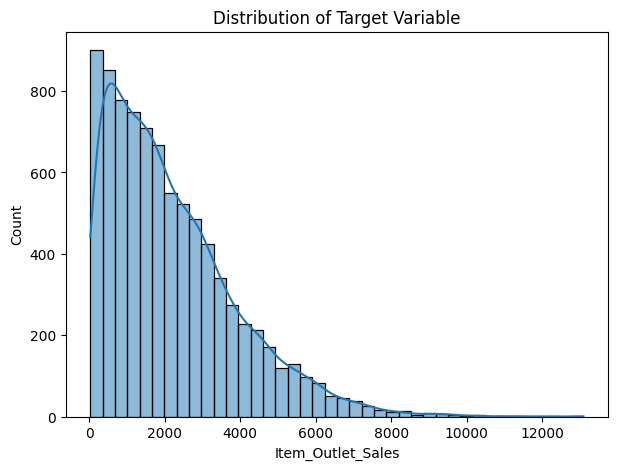

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(Train_df['Item_Outlet_Sales'], bins=40, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

<ipython-input-29-3c0c21daf711>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Train_df.corr()


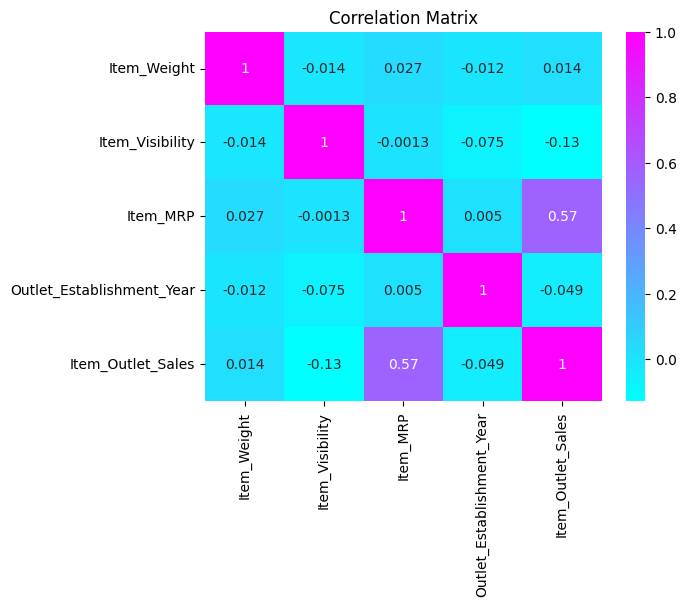

In [ ]:
correlation_matrix = Train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title('Correlation Matrix')
plt.show()

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300          Regular         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Ot

<ipython-input-31-dcf5445ad693>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_test = Test_df.corr()


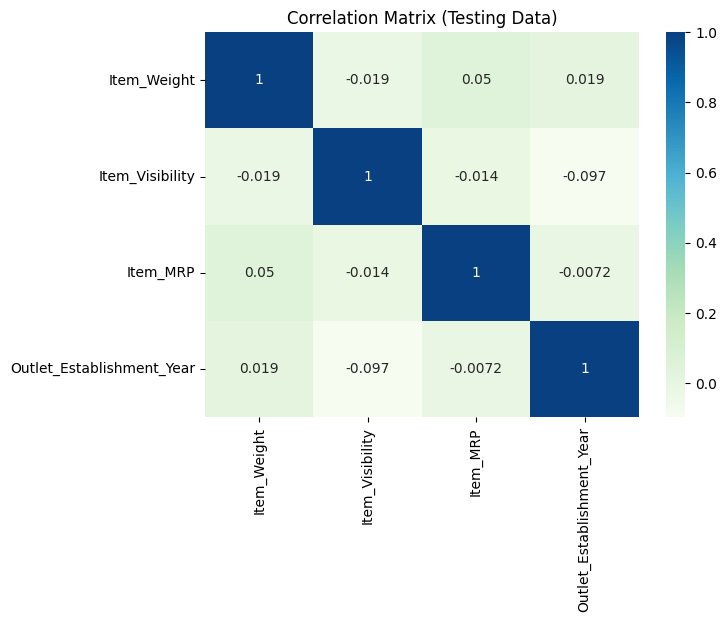

In [ ]:
print(Test_df.describe())
print(Test_df.head())
correlation_matrix_test = Test_df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix_test, annot=True, cmap='GnBu')
plt.title('Correlation Matrix (Testing Data)')
plt.show()

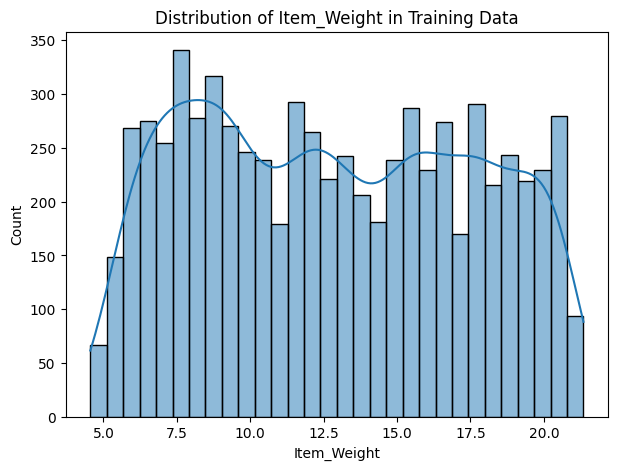

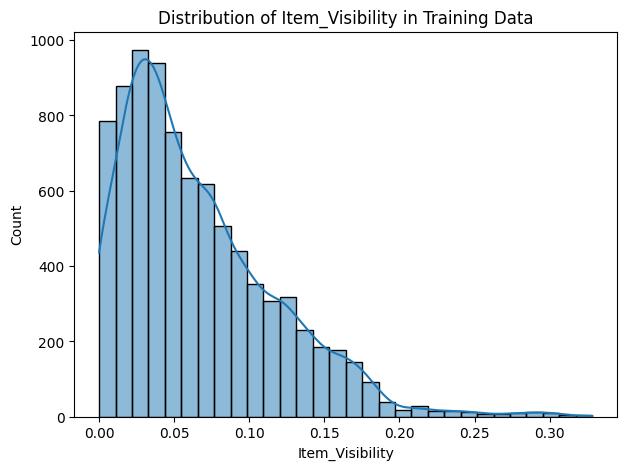

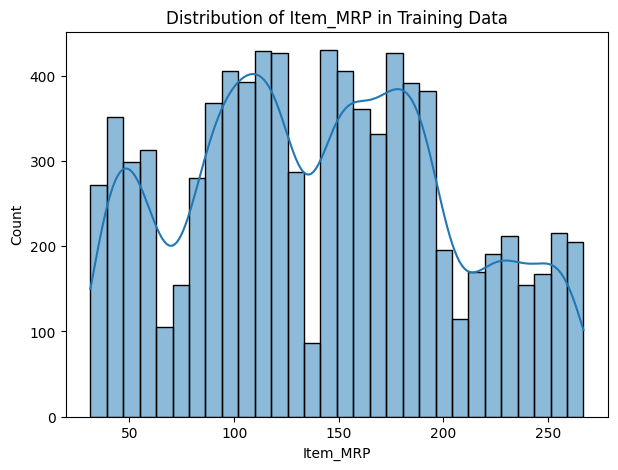

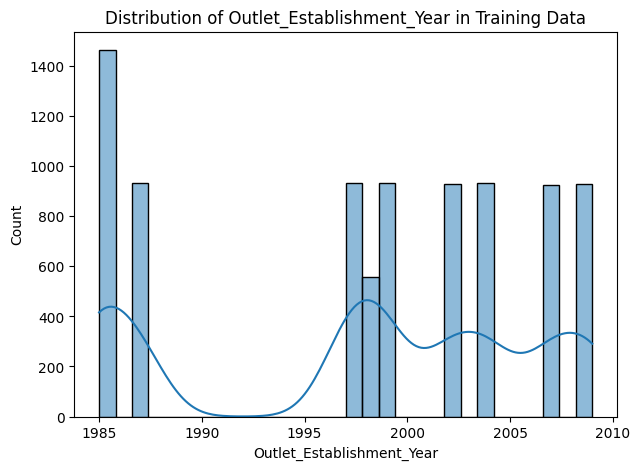

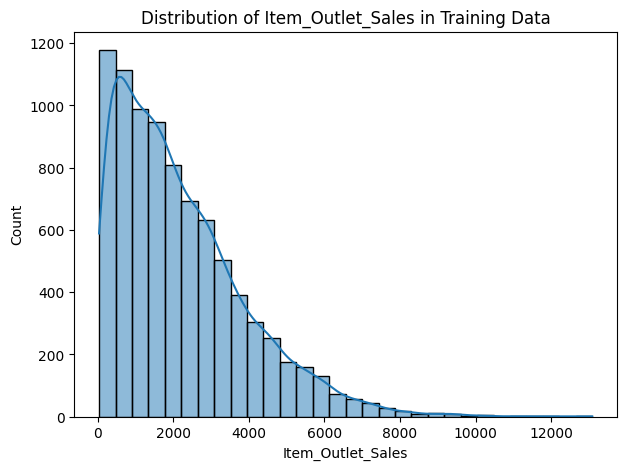

In [ ]:

numerical_features = Train_df.select_dtypes(include=['float64',
'int64']).columns
for feature in numerical_features:
 plt.figure(figsize=(7, 5))
 sns.histplot(Train_df[feature], bins=30, kde=True)
 plt.title(f'Distribution of {feature} in Training Data')
 plt.show( )

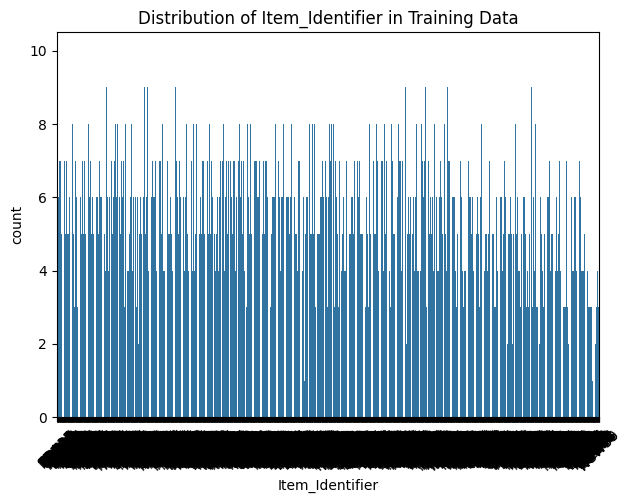

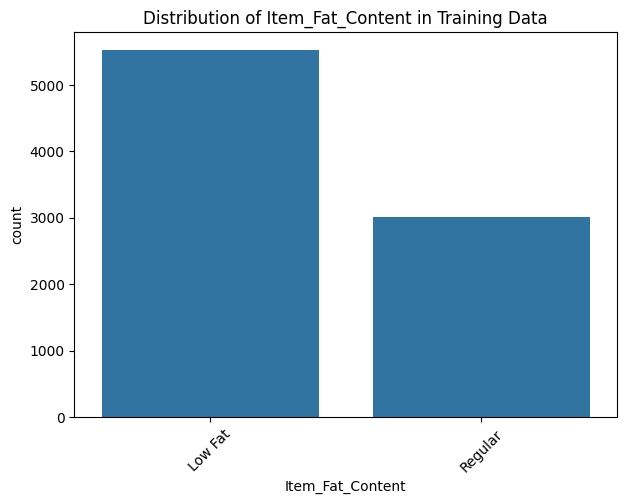

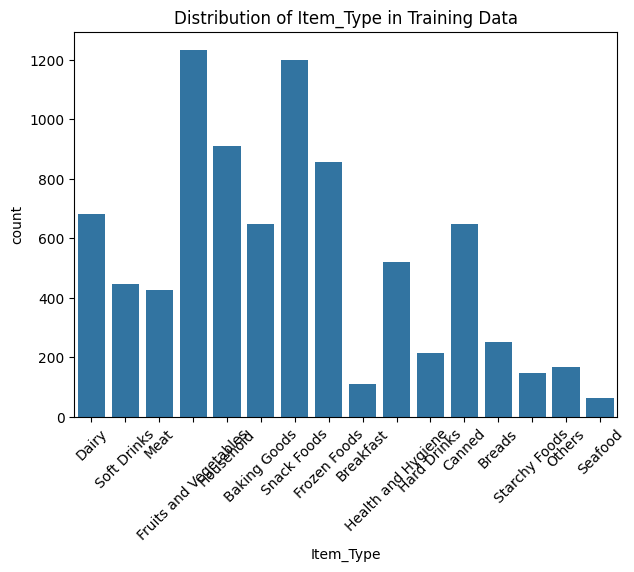

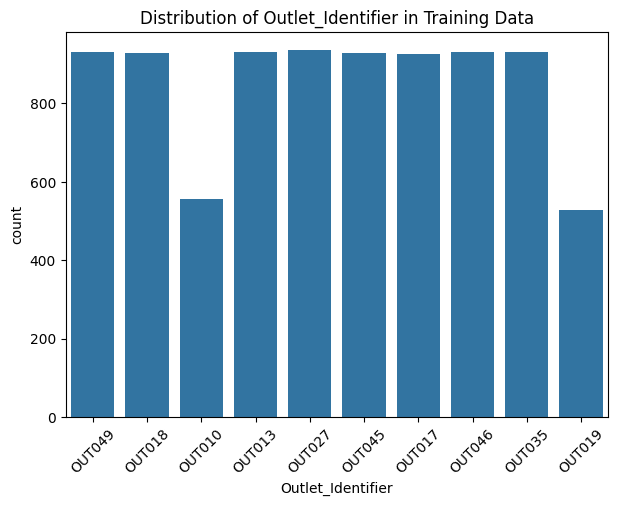

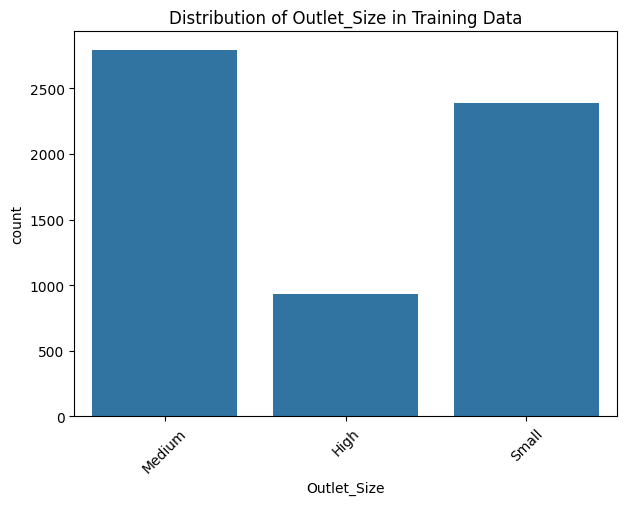

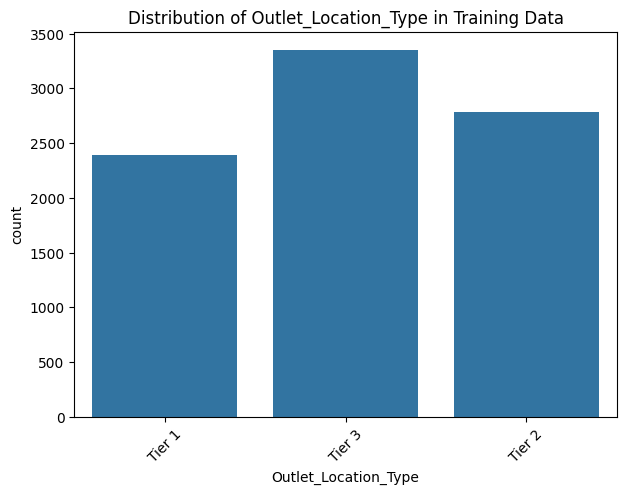

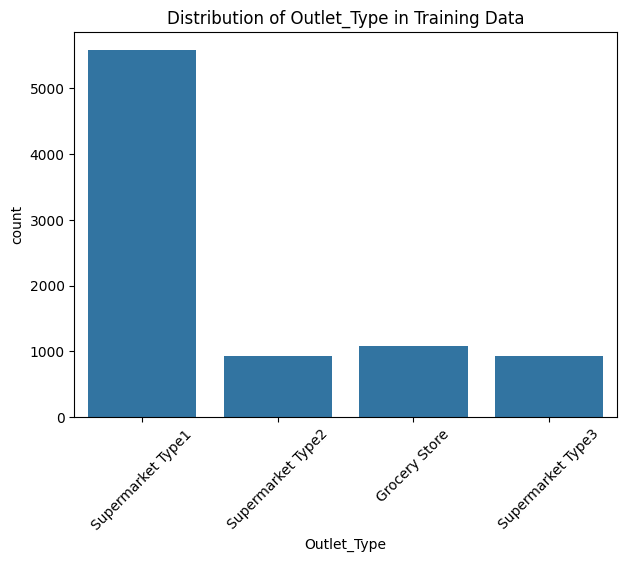

In [ ]:
categorical_features = Train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
 plt.figure(figsize=(7, 5))
 sns.countplot(x=feature, data=Train_df)
 plt.title(f'Distribution of {feature} in Training Data')
 plt.xticks(rotation=45)
 plt.show()

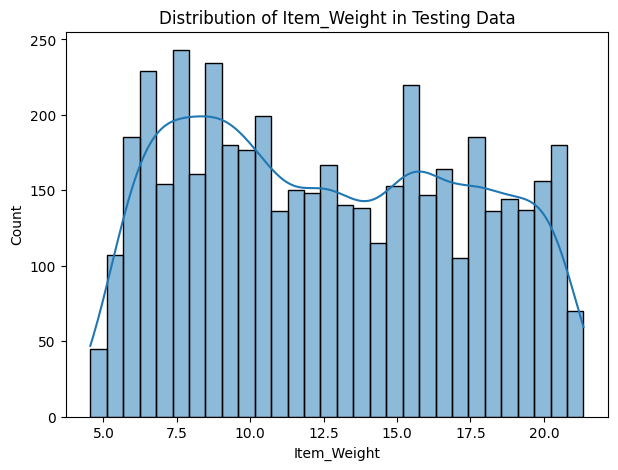

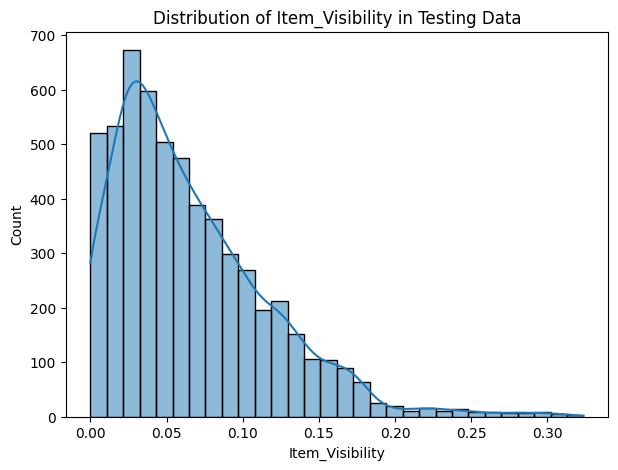

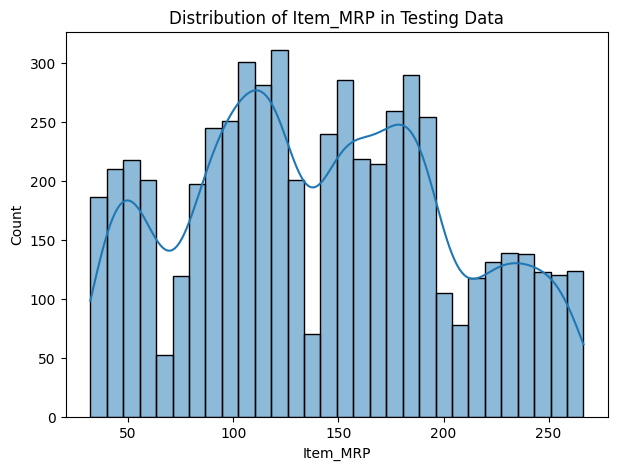

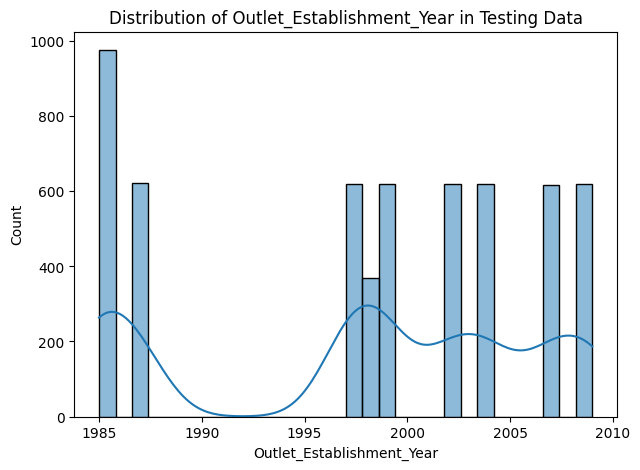

In [ ]:
numerical_features = Test_df.select_dtypes(include=['float64',
'int64']).columns
for feature in numerical_features:
 plt.figure(figsize=(7,5))
 sns.histplot(Test_df[feature], bins=30, kde=True)
 plt.title(f'Distribution of {feature} in Testing Data')
 plt.show()

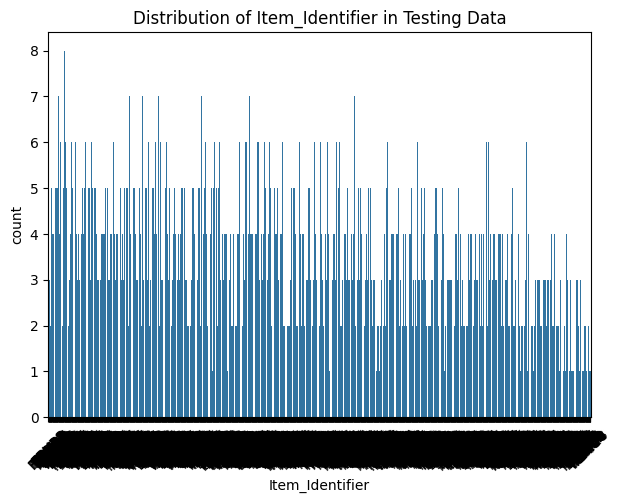

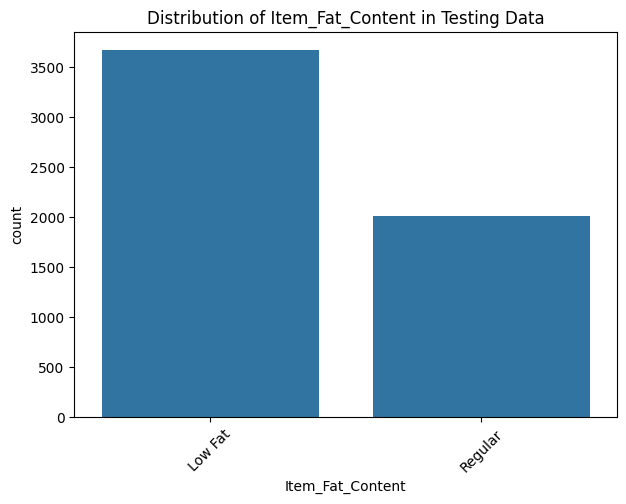

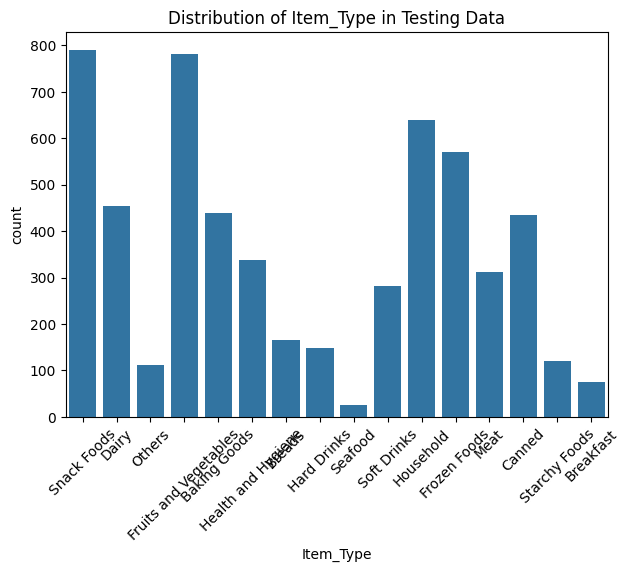

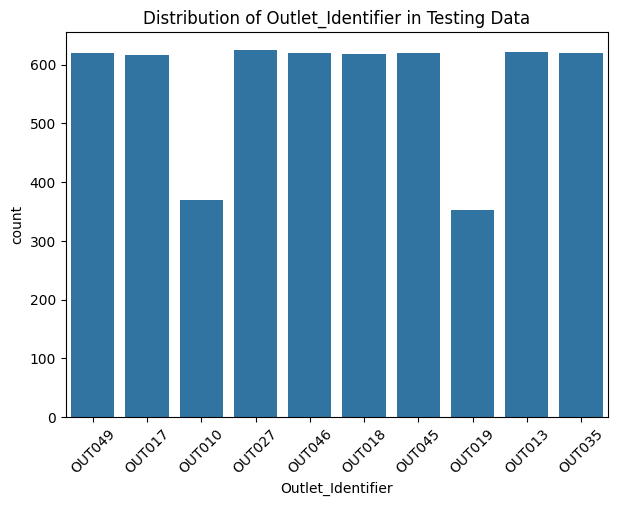

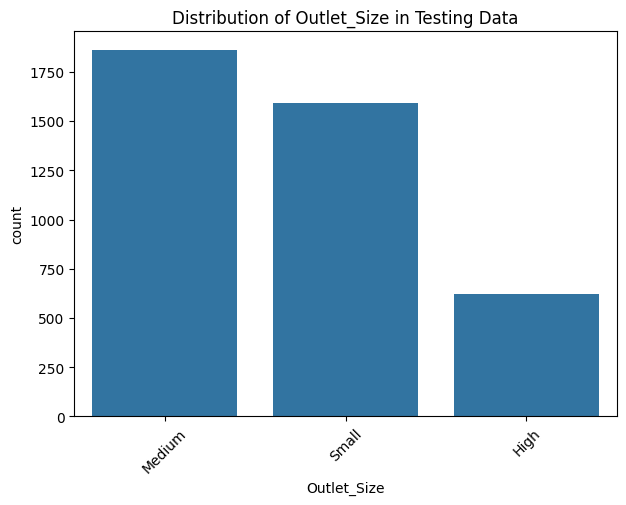

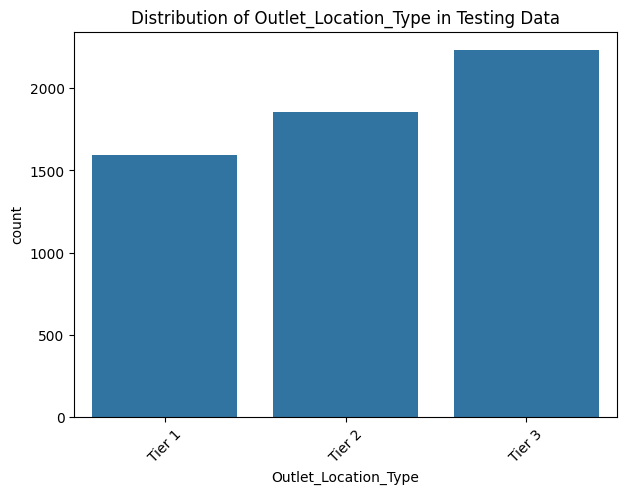

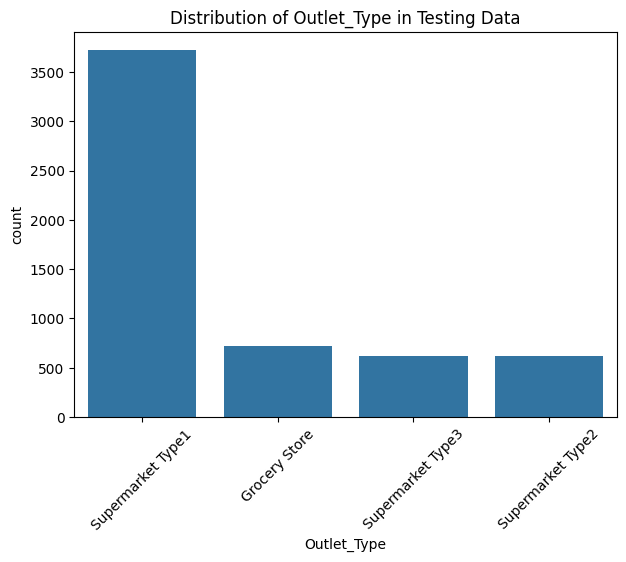

In [ ]:
categorical_features = Test_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
 plt.figure(figsize=(7, 5))
 sns.countplot(x=feature, data=Test_df)
 plt.title(f'Distribution of {feature} in Testing Data')
 plt.xticks(rotation=45)
 plt.show()

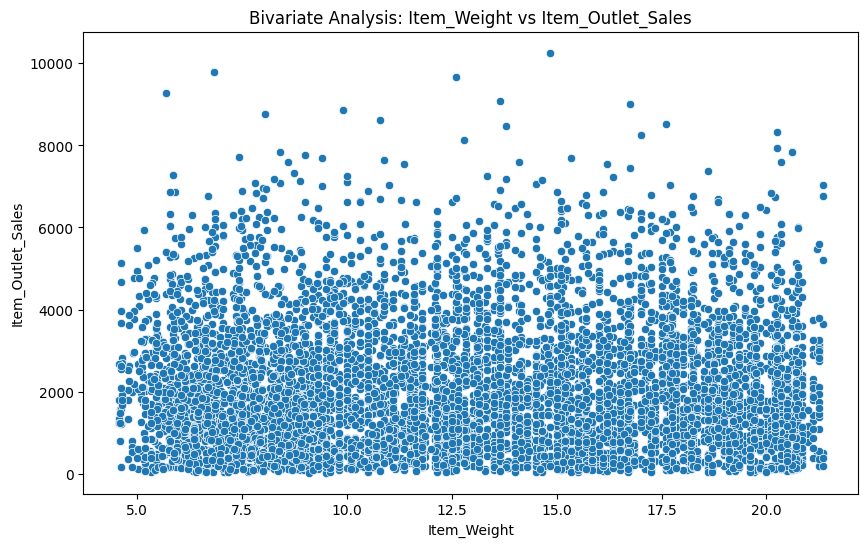

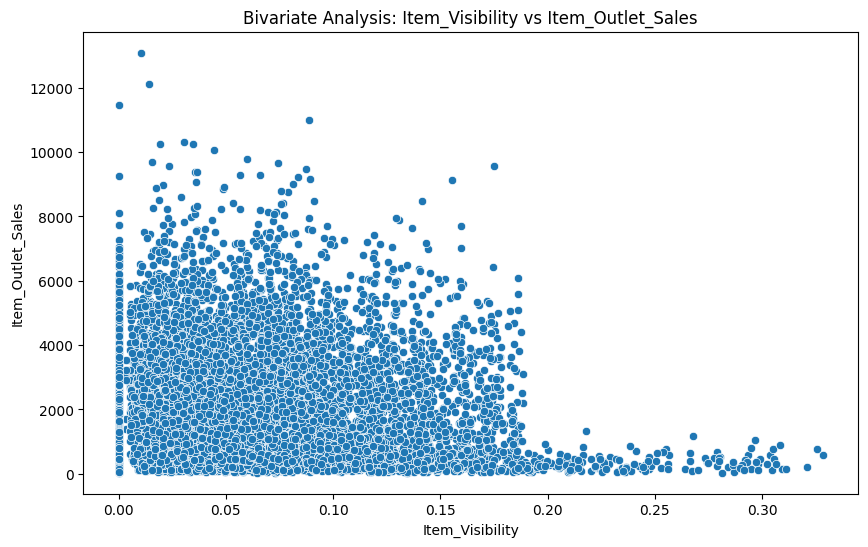

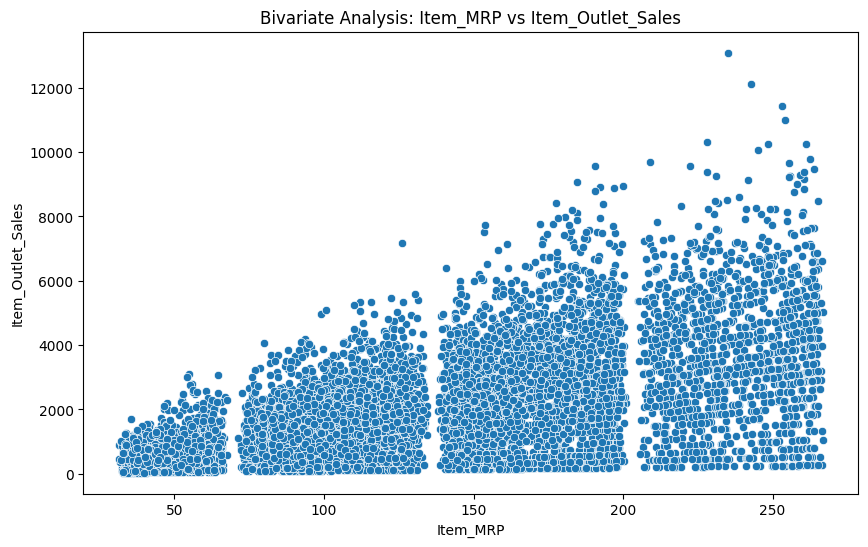

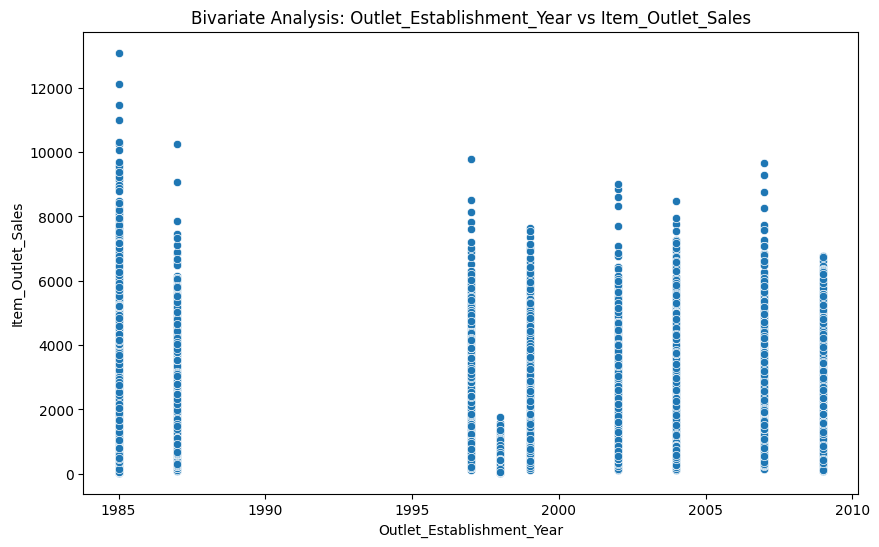

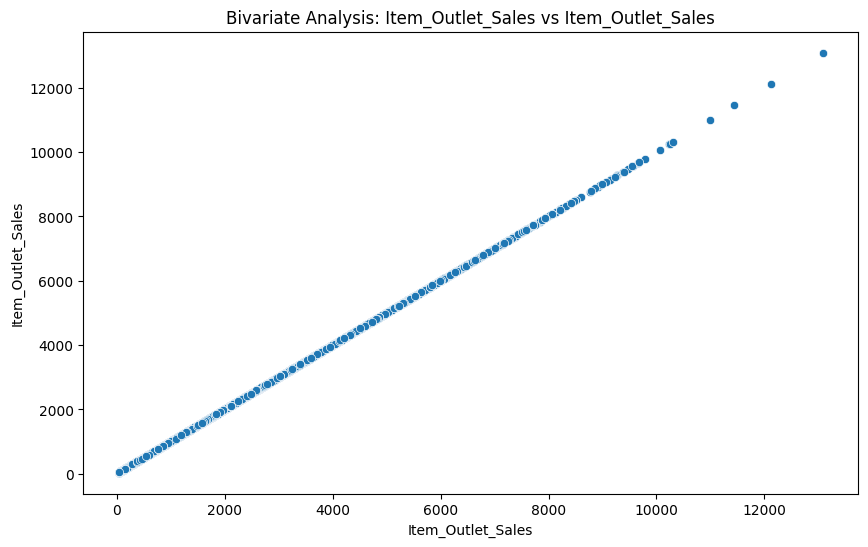

In [ ]:
numerical_features = Train_df.select_dtypes(include=['float64',
'int64']).columns
for feature in numerical_features:
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
 plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
 plt.show()

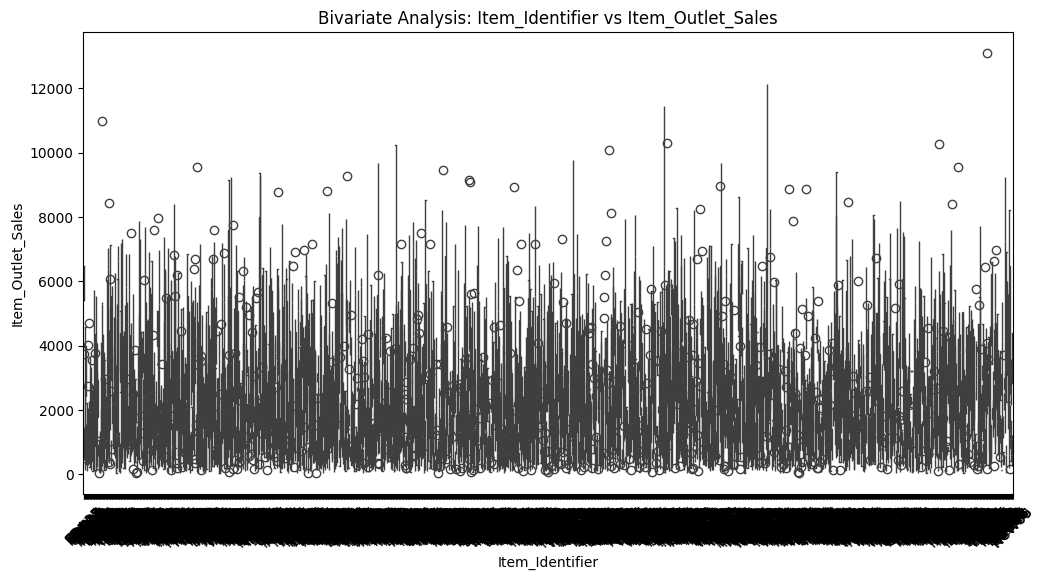

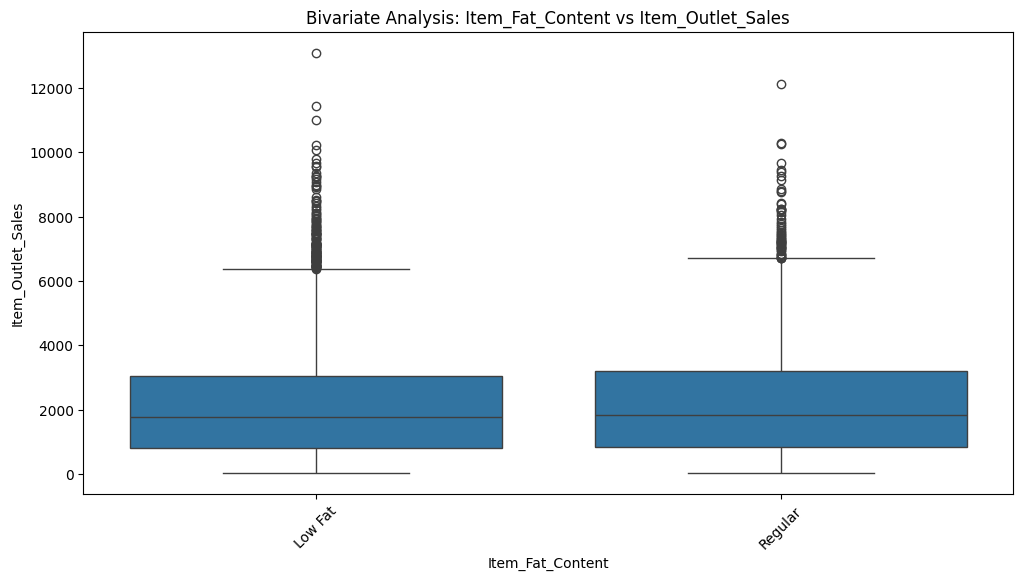

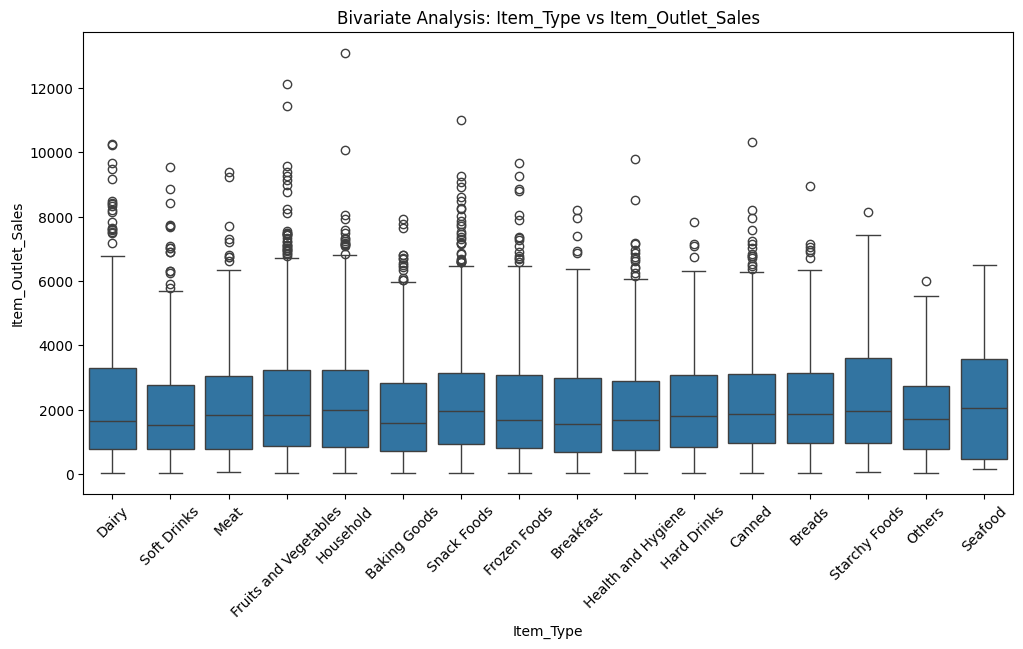

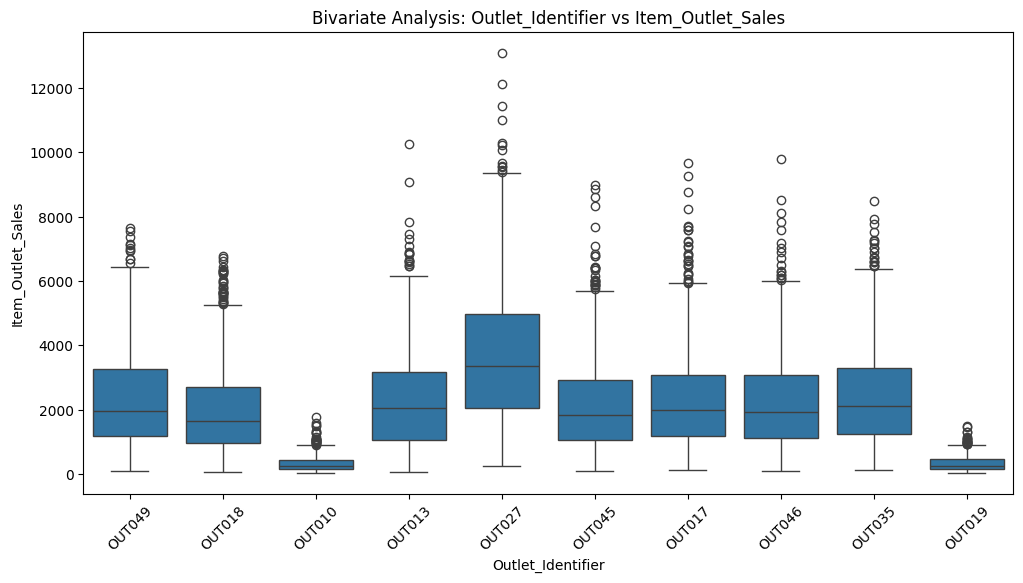

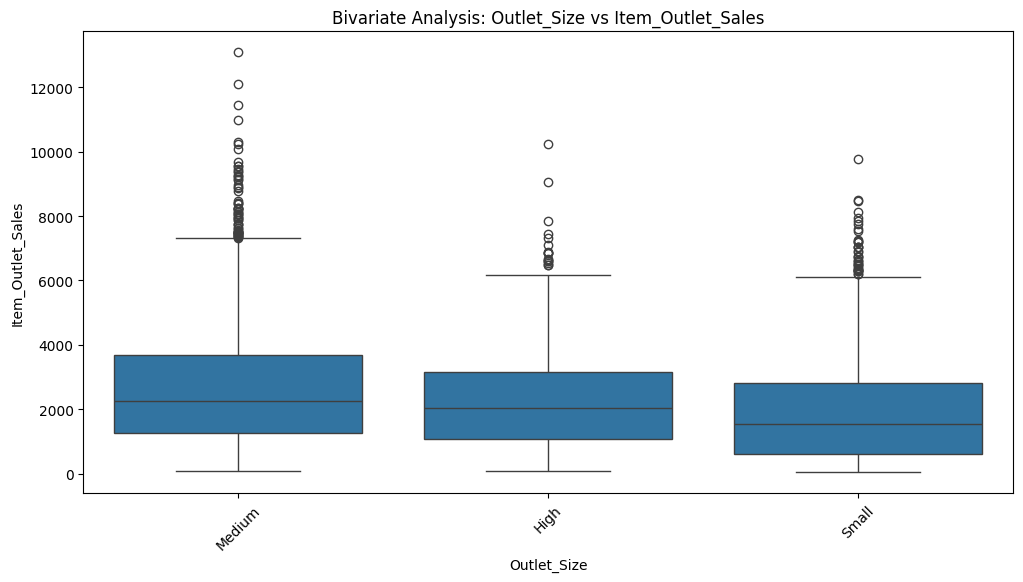

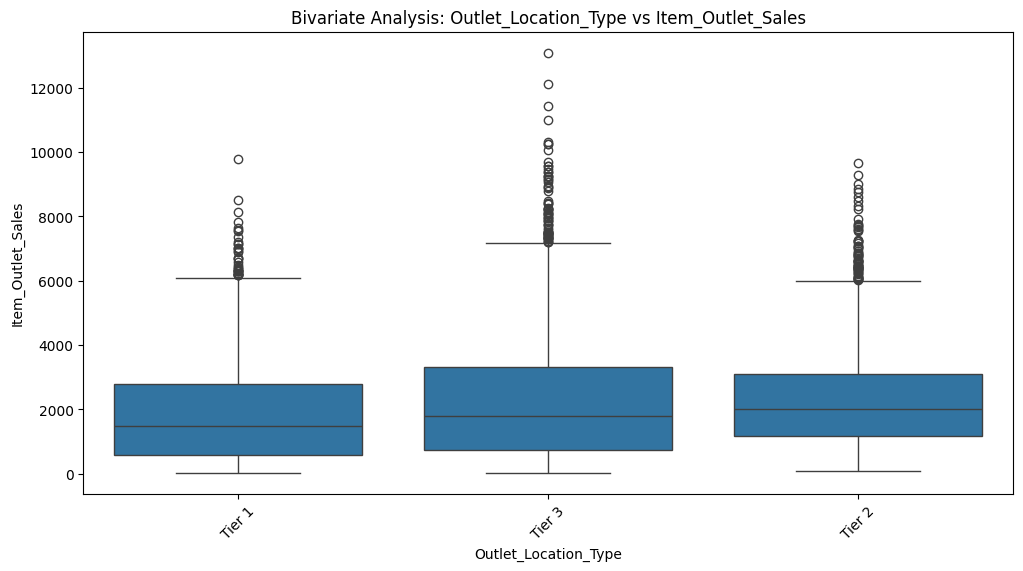

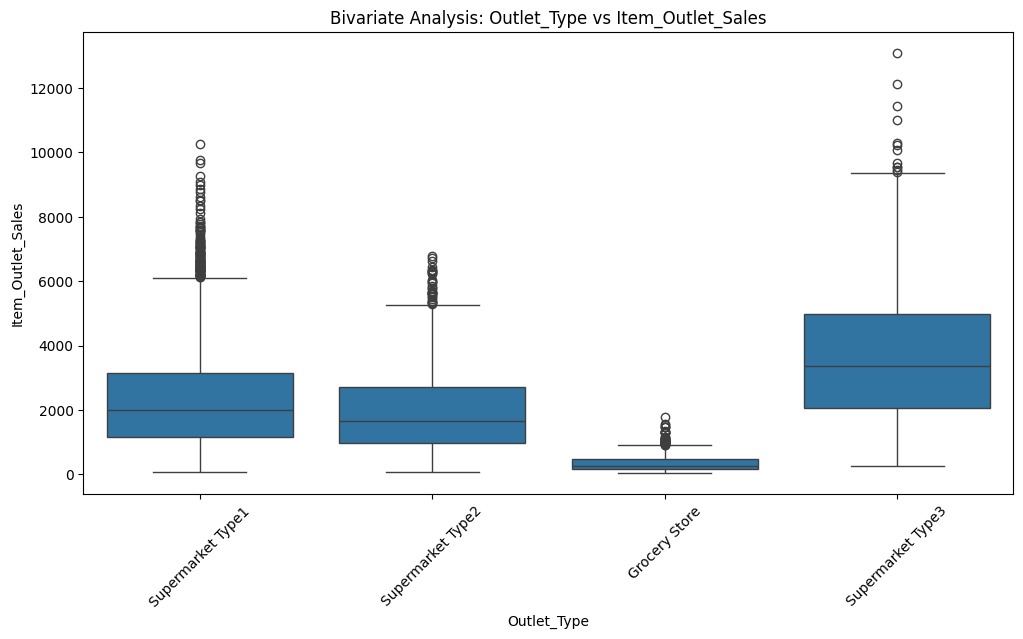

In [ ]:
categorical_features = Train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
 plt.figure(figsize=(12, 6))
 sns.boxplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
 plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
 plt.xticks(rotation=45)
 plt.show()

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

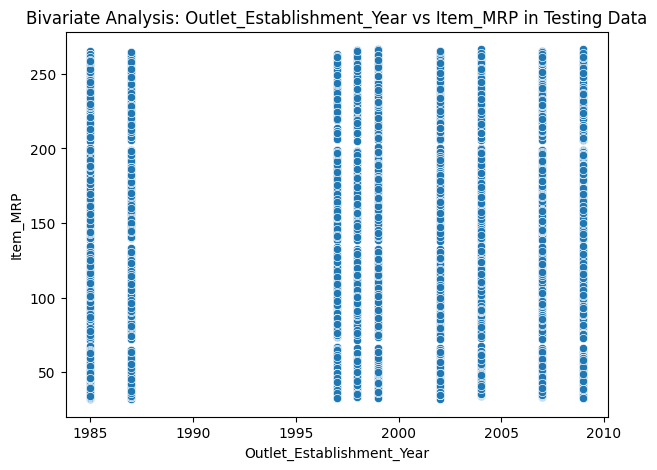

In [ ]:
numerical_features = Test_df.select_dtypes(include=['float64',
'int64']).columns
for feature in numerical_features:
 plt.figure(figsize=(7, 5))
sns.scatterplot(x=feature, y='Item_MRP', data=Test_df)
plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
plt.show()

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

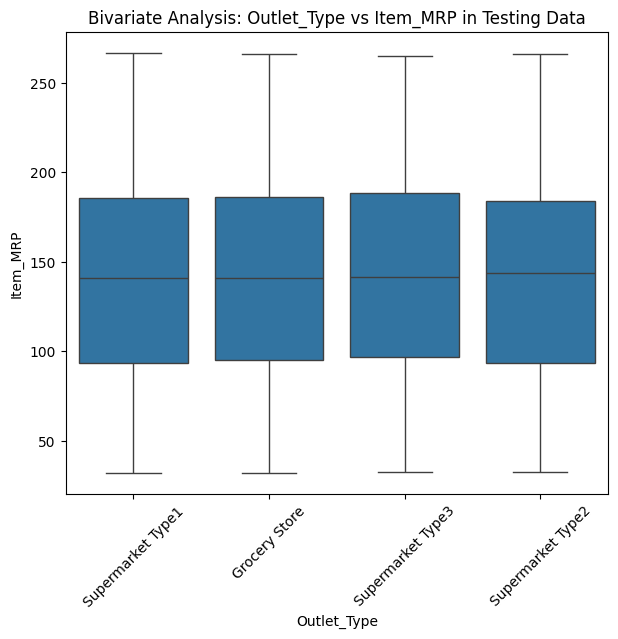

In [ ]:
categorical_features = Test_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
 plt.figure(figsize=(7, 6))
sns.boxplot(x=feature, y='Item_MRP', data=Test_df)
plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#missing values
print(Train_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
imputer_weight = SimpleImputer(strategy='mean')
Train_df['Item_Weight'] = imputer_weight.fit_transform(Train_df[['Item_Weight']])
# size
imputer_size = SimpleImputer(strategy='most_frequent')
Train_df['Outlet_Size'] = imputer_size.fit_transform(Train_df[['Outlet_Size']])

In [ ]:
print(Train_df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
print(Test_df.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [75]:
# feature engineering
print("Unique values in 'Item_Type' column before feature engineering:", Train_df['Item_Type'].unique())
item_type_mapping = {

 'Dairy': 'Perishable',
 'Soft Drinks': 'Non-Perishable',
 'Meat': 'Perishable',
 'Fruits and Vegetables': 'Perishable',
 'Household': 'Non-Perishable',
 'Baking Goods': 'Non-Perishable',
 'Snack Foods': 'Non-Perishable',
 'Frozen Foods': 'Perishable',
 'Breakfast': 'Non-Perishable',
 'Health and Hygiene': 'Non-Perishable',
 'Hard Drinks': 'Non-Perishable',
 'Canned': 'Non-Perishable',
 'Breads': 'Non-Perishable',
 'Starchy Foods': 'Non-Perishable',
 'Others': 'Non-Perishable',
 'Seafood': 'Perishable',
}


Unique values in 'Item_Type' column before feature engineering: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [77]:
Train_df['Item_Category'] = Train_df['Item_Type'].map(item_type_mapping)

In [79]:
print("Unique values in 'Item_Type' column before feature engineering:", Test_df['Item_Type'].unique())

Unique values in 'Item_Type' column before feature engineering: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [81]:
# Install the required module
!pip install sklearn

# Import the required module
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type',
'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
'Outlet_Type']

# Define a function to encode categorical data
def label_encode_data(data, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        if column in data.columns:
            data[column] = label_encoder.fit_transform(data[column])
    return data

# Encode the training and test datasets
Train_df_encoded = label_encode_data(Train_df.copy(), categorical_columns)
Test_df_encoded = label_encode_data(Test_df.copy(), categorical_columns)

# Print the encoded training dataset
print("Encoded Training Dataset:")
Train_df_encoded.head()

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Encoded Training Dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,Perishable
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,Non-Perishable
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,Perishable
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,Perishable
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,Non-Perishable


In [82]:
categorical_columns = ['Item_Fat_Content', 'Item_Type',
'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
'Outlet_Type']

Train_df_encoded_onehot = pd.get_dummies(Train_df,
columns=categorical_columns, drop_first=True)
Test_df_encoded_onehot = pd.get_dummies(Test_df,
columns=categorical_columns, drop_first=True)

print("One-Hot Encoded Training Dataset:")
print(Train_df_encoded_onehot)
print("\nOne-Hot Encoded Testing Dataset:")
print(Test_df_encoded_onehot)

One-Hot Encoded Training Dataset:
     Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.000000  182.0950   
4              NCD19        8.930         0.000000   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

      Outlet_Establishment_Year  Item_Outlet_Sales   Item_Category  \
0                          1999          3735.1380      Perishable   
1                          2009           443.4228  Non-P

In [85]:
X_train = Train_df_encoded_onehot.drop(columns=['Item_Identifier',
'Item_Outlet_Sales'])
y_train = Train_df_encoded_onehot['Item_Outlet_Sales']
# Separate features for testing set
X_test = Test_df_encoded_onehot.drop(columns=['Item_Identifier'])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
# X_train shape: (83, 37)
# X_test shape: (51, 37)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
 X_train, y_train, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (8523, 40)
y_train shape: (8523,)
X_test shape: (5681, 39)
X_train shape: (6818, 40)
y_train shape: (6818,)
X_val shape: (1705, 40)
y_val shape: (1705,)


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb_param_dist = {
 'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'subsample': [0.8, 0.9, 1.0],
 'colsample_bytree': [0.8, 0.9, 1.0],
}
# Create XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror',
random_state=42)
xgb_random_search = RandomizedSearchCV(
 xgb_model,
 param_distributions=xgb_param_dist,
 scoring='neg_mean_squared_error',
 n_iter=10, # You can adjust the number of iterations
 cv=3,
 random_state=42
)
xgb_random_search.fit(X_train, y_train)

print("Best hyperparameters for XGBoost:")
print(xgb_random_search.best_params_)

Best hyperparameters for XGBoost:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
